In [28]:
import torch
from PIL import Image 
from torchvision import transforms
import torch.nn as nn

In [2]:
model = torch.load('saved_model.pt')
model.eval()

c:\Users\vladv\anaconda3\envs\grayce-tf\lib\site-packages\torch\serialization.py:995: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


RecursiveScriptModule(
  original_name=CNN
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (relu1): RecursiveScriptModule(original_name=ReLU)
  (maxpooling1): RecursiveScriptModule(original_name=MaxPool2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (relu2): RecursiveScriptModule(original_name=ReLU)
  (maxpooling2): RecursiveScriptModule(original_name=MaxPool2d)
  (conv3): RecursiveScriptModule(original_name=Conv2d)
  (relu3): RecursiveScriptModule(original_name=ReLU)
  (maxpooling3): RecursiveScriptModule(original_name=MaxPool2d)
  (output): RecursiveScriptModule(original_name=Linear)
  (loss): RecursiveScriptModule(original_name=CrossEntropyLoss)
)

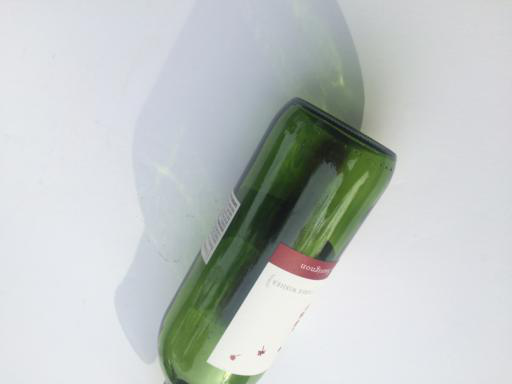

In [8]:
img = Image.open('sample.jpg', mode='r')
img

In [29]:
transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.Resize((48, 64))
])
# transforms.ToPILImage()(transform(img))
inp = transform(img)

c:\Users\vladv\anaconda3\envs\grayce-tf\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [33]:
with torch.no_grad(): 
    output = model.forward(inp.type(torch.float).unsqueeze(0))
    # print(output)
    preds = nn.functional.softmax(output)
    print(preds)

tensor([[2.6429e-03, 8.1355e-01, 9.1079e-02, 7.6333e-04, 9.1836e-02, 1.3243e-04]])


C:\Users\vladv\AppData\Local\Temp\ipykernel_23556\2454981651.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = nn.functional.softmax(output)


In [35]:
preds.tolist()[0]

[0.0026429241988807917,
 0.8135471343994141,
 0.09107863903045654,
 0.0007633276400156319,
 0.09183550626039505,
 0.00013242929708212614]

In [26]:
inp.type(torch.float).unsqueeze(0)

tensor([[[[224., 225., 223.,  ..., 210., 208., 208.],
          [225., 224., 223.,  ..., 211., 209., 209.],
          [225., 225., 222.,  ..., 212., 210., 209.],
          ...,
          [228., 228., 229.,  ..., 223., 222., 221.],
          [225., 226., 227.,  ..., 223., 222., 221.],
          [225., 225., 226.,  ..., 222., 221., 221.]],

         [[223., 224., 224.,  ..., 210., 210., 210.],
          [224., 223., 224.,  ..., 211., 210., 210.],
          [226., 226., 226.,  ..., 212., 211., 210.],
          ...,
          [229., 229., 230.,  ..., 224., 223., 222.],
          [229., 230., 231.,  ..., 224., 223., 222.],
          [229., 229., 230.,  ..., 223., 222., 222.]],

         [[228., 229., 228.,  ..., 210., 207., 207.],
          [229., 228., 228.,  ..., 211., 212., 212.],
          [230., 230., 229.,  ..., 214., 213., 212.],
          ...,
          [233., 233., 234.,  ..., 228., 227., 226.],
          [232., 233., 234.,  ..., 228., 225., 224.],
          [232., 232., 233.,  ...